In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

Attribute Information:

1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)

In [3]:
attributes = ['name','landmass','zone','area','population','language','religion','bars','stripes','colours','red','green',
              'blue','gold','white','black','orange','mainhue','circles','crosses','saltires','quarters','sunstars','crescent',
              'triangle','icon','animate','text','topleft','botright']

In [4]:
data = pd.read_csv('flag.data', names=attributes)
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [5]:
#drop non numeric features
data_core = data.drop(['name', 'mainhue', 'topleft', 'botright','religion'], axis=1)
data_core.head()

,landmass,zone,area,population,language,bars,stripes,colours,red,green,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
0,5,1,648,16,10,0,3,5,1,1,...,0,0,0,0,1,0,0,1,0,0
1,3,1,29,3,6,0,0,3,1,0,...,0,0,0,0,1,0,0,0,1,0
2,4,1,2388,20,8,2,0,3,1,1,...,0,0,0,0,1,1,0,0,0,0
3,6,3,0,0,1,0,0,5,1,0,...,0,0,0,0,0,0,1,1,1,0
4,3,1,0,0,6,3,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
def religions(data):
    if data == 1:
        return 0 #Christian 
    elif data == 2: #Muslims
        return 1
    else:
        return 2 #Others

In [7]:
target = data['religion'].apply(religions)
target

0      1
1      2
2      1
3      0
4      2
      ..
189    0
190    2
191    2
192    2
193    2
Name: religion, Length: 194, dtype: int64

### Normalizing data with StandardScaler

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
standard_df = scaler.fit_transform(data_core)
standard_df = pd.DataFrame(standard_df, columns=data_core.columns)
standard_df.head()

,landmass,zone,area,population,language,bars,stripes,colours,red,green,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
0,0.921773,-0.928303,-0.024036,-0.079262,1.336144,-0.437990,0.623796,1.184519,0.517662,1.063893,...,-0.368284,-0.388885,-0.319801,-0.343852,-0.088167,-0.245172,-0.402090,1.720228,-0.501610,-0.299813
1,-0.369375,-0.928303,-0.309906,-0.221033,0.189189,-0.437990,-0.668195,-0.357740,0.517662,-0.939944,...,-0.368284,-0.388885,-0.319801,-0.343852,-0.088167,-0.245172,-0.402090,-0.581318,1.993579,-0.299813
2,0.276199,-0.928303,0.779538,-0.035640,0.762666,1.493147,-0.668195,-0.357740,0.517662,1.063893,...,-0.368284,-0.388885,-0.319801,-0.343852,-0.088167,4.078770,-0.402090,-0.581318,-0.501610,-0.299813
3,1.567346,0.604384,-0.323298,-0.253750,-1.244506,-0.437990,-0.668195,1.184519,0.517662,-0.939944,...,-0.368284,-0.388885,-0.319801,-0.343852,-0.316225,-0.245172,2.487003,1.720228,1.993579,-0.299813
4,-0.369375,-0.928303,-0.323298,-0.253750,0.189189,2.458716,-0.668195,-0.357740,0.517662,-0.939944,...,-0.368284,-0.388885,-0.319801,-0.343852,-0.316225,-0.245172,-0.402090,-0.581318,-0.501610,-0.299813


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
from imblearn.over_sampling import SMOTE

# KNN, SVC, RF after Standard scaling

In [15]:
X = standard_df
y = target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
#raw size of target class
y.value_counts()

2    98
0    60
1    36
Name: religion, dtype: int64

In [18]:
#size of target class after train_test_split
y_train.value_counts()

2    68
0    38
1    29
Name: religion, dtype: int64

### Balancing train data with SMOTE

In [19]:
sm = SMOTE(random_state=0,k_neighbors=5)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [20]:
#size of target class after SMOTE balancing
y_res.value_counts()

2    68
0    68
1    68
Name: religion, dtype: int64

### Start GridSearch

In [21]:
# Grid_Searching params for KNN classificator
param_knn = {'n_neighbors':[1,5,10,15,20,25,30,45,50], 'weights':['uniform','distance'], 
              'algorithm':['ball_tree', 'kd_tree', 'brute']}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_knn, verbose=3, n_jobs=-1)
knn_grid.fit(X_res, y_res)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 5, 10, 15, 20, 25, 30, 45, 50],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [22]:
print(knn_grid.best_score_, '\n', knn_grid.best_estimator_)

0.8287804878048781 
 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)


In [23]:
knn_pred = knn_grid.predict(X_test)

In [24]:
# KNN classificator report
print(confusion_matrix(y_test, knn_pred),'\n',classification_report(y_test,knn_pred))

[[13  2  7]
 [ 0  7  0]
 [ 5  7 18]] 
               precision    recall  f1-score   support

           0       0.72      0.59      0.65        22
           1       0.44      1.00      0.61         7
           2       0.72      0.60      0.65        30

    accuracy                           0.64        59
   macro avg       0.63      0.73      0.64        59
weighted avg       0.69      0.64      0.65        59



In [25]:
# Grid_Searching params for SVC classificator
param_svc = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001], 'kernel':['linear', 'rbf']}
svc_grid = GridSearchCV(SVC(), param_svc, verbose=3, n_jobs=-1)
svc_grid.fit(X_res, y_res)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [26]:
print(svc_grid.best_score_, '\n', svc_grid.best_estimator_)

0.8584146341463414 
 SVC(C=10, gamma=0.1)


In [27]:
# SVC classificator report
svc_pred = svc_grid.predict(X_test)
print(confusion_matrix(y_test, svc_pred),'\n',classification_report(y_test, svc_pred))

[[12  1  9]
 [ 1  3  3]
 [ 3  3 24]] 
               precision    recall  f1-score   support

           0       0.75      0.55      0.63        22
           1       0.43      0.43      0.43         7
           2       0.67      0.80      0.73        30

    accuracy                           0.66        59
   macro avg       0.62      0.59      0.60        59
weighted avg       0.67      0.66      0.66        59



In [28]:
# Grid_Searching params for RF classificator
param_rf = {'bootstrap': [True, False],
 'max_depth': [10,20,30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600]
             }
rf_grid = GridSearchCV(RandomForestClassifier(), param_rf, verbose=3, n_jobs=-1)
rf_grid.fit(X_res, y_res)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600]},
             verbose=3)

In [29]:
print(rf_grid.best_score_,'\n', rf_grid.best_estimator_)

0.8776829268292683 
 RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=400)


In [30]:
# SVC classificator report
rf_pred = rf_grid.predict(X_test)
print(confusion_matrix(y_test, svc_pred),'\n',classification_report(y_test, svc_pred))

[[12  1  9]
 [ 1  3  3]
 [ 3  3 24]] 
               precision    recall  f1-score   support

           0       0.75      0.55      0.63        22
           1       0.43      0.43      0.43         7
           2       0.67      0.80      0.73        30

    accuracy                           0.66        59
   macro avg       0.62      0.59      0.60        59
weighted avg       0.67      0.66      0.66        59



## Visualizing with t-SNE

In [31]:
from sklearn.manifold import TSNE

In [32]:
tsne_standard_model = TSNE(n_components=2, random_state=0, perplexity=30.0, angle=0, n_iter=1000).fit_transform(standard_df)
tsne_standard_model.shape

(194, 2)

In [33]:
X = tsne_standard_model
y = target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
sm = SMOTE(random_state=0,k_neighbors=5)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [35]:
h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "SVM.SVC",
    "Random Forest",
]

# classifiers = [
#     KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1),
#     SVC(kernel="rbf", C=10, gamma=0.1),
#     RandomForestClassifier(bootstrap=False, max_depth=10, max_features='sqrt',
#                        min_samples_leaf=2, min_samples_split=5, n_estimators=600)
# ]

classifiers = [
    knn_grid.best_estimator_,
    svc_grid.best_estimator_,
    rf_grid.best_estimator_
]


In [36]:
# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

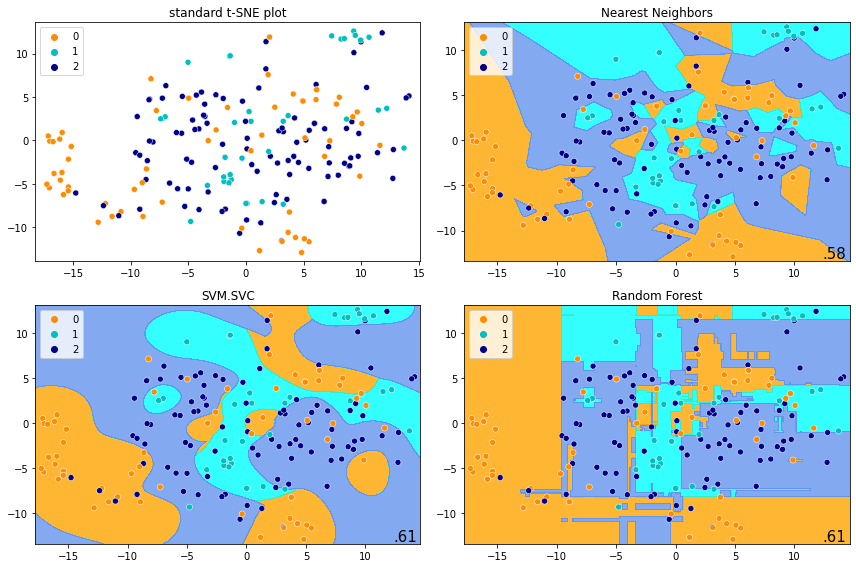

In [37]:
plt.figure(figsize=(12,8))
i = 1

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
ax = plt.subplot(2, 2, i)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# Plot the testing points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, edgecolors="k")

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_title('standard t-SNE plot')

i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(2, 2, i)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
     
    clf.fit(X_res, y_res)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].   
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    # Plot the testing points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, edgecolors="k")

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    
    ax.set_title(name)
    ax.text(xx.max() - 0.3, yy.min() + 0.3, ("%.2f" % score).lstrip("0"), size=15, horizontalalignment="right")
    
    i += 1
        
plt.tight_layout()

## Visualizing with UMAP

In [38]:
from umap import UMAP

In [39]:
umap_standard_model = UMAP().fit_transform(standard_df)
umap_standard_model.shape

(194, 2)

In [40]:
X = umap_standard_model
y = target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
sm = SMOTE(random_state=0,k_neighbors=5)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [42]:
h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "SVM.SVC",
    "Random Forest",
]

# classifiers = [
#     KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1),
#     SVC(kernel="rbf", C=10, gamma=0.1),
#     RandomForestClassifier(bootstrap=False, max_depth=10, max_features='sqrt',
#                        min_samples_leaf=2, min_samples_split=5, n_estimators=600)
# ]

classifiers = [
    knn_grid.best_estimator_,
    svc_grid.best_estimator_,
    rf_grid.best_estimator_
]


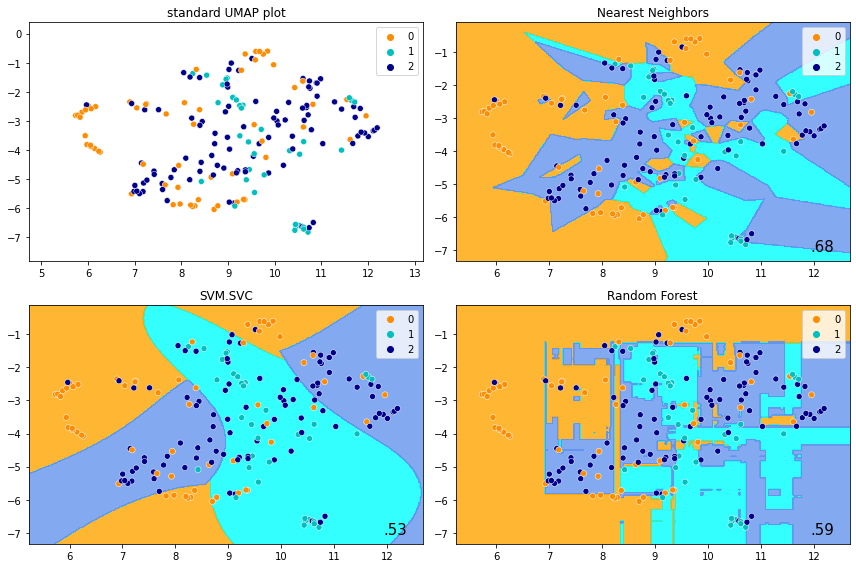

In [43]:
plt.figure(figsize=(12,8))
i = 1

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
ax = plt.subplot(2, 2, i)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# Plot the testing points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, edgecolors="k")

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_title('standard UMAP plot')

i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(2, 2, i)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
     
    clf.fit(X_res, y_res)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].   
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    # Plot the testing points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, edgecolors="k")

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    
    ax.set_title(name)
    ax.text(xx.max() - 0.3, yy.min() + 0.3, ("%.2f" % score).lstrip("0"), size=15, horizontalalignment="right")
    
    i += 1
        
plt.tight_layout()

# Checking CatBoost model and feature importances + SHAP

In [44]:
from catboost import CatBoostClassifier

In [45]:
X =  data.drop(['name', 'religion', 'mainhue', 'topleft', 'botright'], axis=1)
y = target

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
cat_features = ['landmass', 'zone', 'language',
        'bars', 'stripes', 'colours', 'red', 'green', 'blue',
       'gold', 'white', 'black', 'orange', 'circles', 'crosses',
       'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon',
       'animate', 'text']

In [48]:
model = CatBoostClassifier(verbose=100, auto_class_weights='Balanced', use_best_model=True,
                           early_stopping_rounds=200,
                           learning_rate = 0.001,
                           eval_metric='AUC', 
                           cat_features=cat_features)

In [49]:
model.fit(X_train, y_train,eval_set=(X_test,y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6493506	best: 0.6493506 (0)	total: 189ms	remaining: 3m 9s
100:	test: 0.8943723	best: 0.8963925 (84)	total: 7.75s	remaining: 1m 9s
200:	test: 0.9024531	best: 0.9076479 (190)	total: 15.9s	remaining: 1m 3s
300:	test: 0.9023810	best: 0.9076479 (190)	total: 23.3s	remaining: 54s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9076479076
bestIteration = 190

Shrink model to first 191 iterations.


In [50]:
fi = pd.DataFrame({'cols': X.columns, 'features':model.feature_importances_})

In [57]:
fi.sort_values('features', ascending=False).head()

,cols,features
4,language,37.415968
0,landmass,36.931994
16,crosses,6.703609
1,zone,5.619150
18,quarters,2.394674


In [53]:
import shap

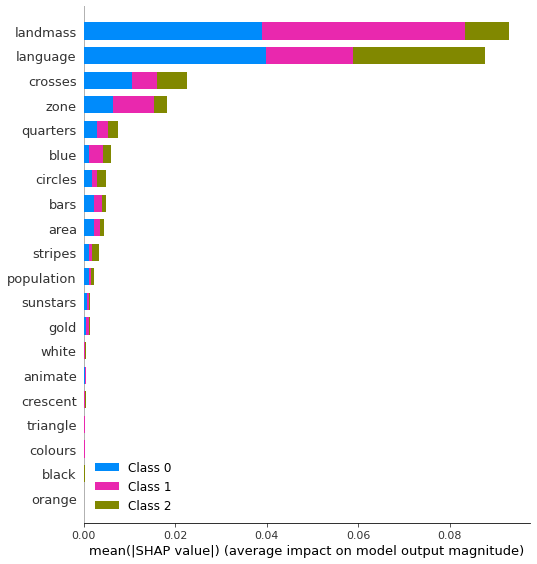

In [54]:
# load JS visualization code to notebook
shap.initjs()


# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar")

In [55]:
predict = model.predict(X_test)

In [56]:
print(confusion_matrix(y_test, predict),'\n', classification_report(y_test, predict))

[[15  2  5]
 [ 0  6  1]
 [ 4  8 18]] 
               precision    recall  f1-score   support

           0       0.79      0.68      0.73        22
           1       0.38      0.86      0.52         7
           2       0.75      0.60      0.67        30

    accuracy                           0.66        59
   macro avg       0.64      0.71      0.64        59
weighted avg       0.72      0.66      0.67        59

